# Let's make some nice figures

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable


import numpy as np
import pandas as pd
import xarray as xr
import math
import gsw

import mixsea as mx

In [2]:
mpl.rcParams.update({
    'font.size': 18+8,           # Default font size
    'axes.labelsize': 18+8,      # Font size for axis labels
    'axes.titlesize': 20+8,      # Font size for titles
    'xtick.labelsize': 16+8,     # Font size for x-axis ticks
    'ytick.labelsize': 16+8,     # Font size for y-axis ticks
    'legend.fontsize': 16+8,     # Font size for legend
    'figure.titlesize': 22+8     # Font size for figure titles
})

In [3]:
# Load ADCP Data
datadir = 'data/2023/adcp/'
filepath_adcp = datadir+'2023_os75nb_cleaned.nc'
ADCP_2023 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2023/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density
filepath_coords = 'coords.csv' # coords

P_2023 = pd.read_csv(datadir + filepath_P)
T_2023 = pd.read_csv(datadir + filepath_T)
S_2023 = pd.read_csv(datadir + filepath_S)
D_2023 = pd.read_csv(datadir + filepath_D)

coords = pd.read_csv(datadir + filepath_coords)
latitudes_2023 = coords.T[0].values

# Load Interpolated CTD Data
datadir = 'data/2023/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2023 = pd.read_csv(datadir + filepath_P_int)
T_int_2023 = pd.read_csv(datadir + filepath_T_int)
S_int_2023 = pd.read_csv(datadir + filepath_S_int)
D_int_2023 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2023 = pd.read_csv(datadir + filepath_lat)

# Load ADCP Data
datadir = 'data/2024/adcp/'
filepath_adcp = datadir+'2024_os75nb_cleaned.nc'
ADCP_2024 = xr.open_dataset(filepath_adcp, decode_times=False)

# Load CTD Cast Data
datadir = 'data/2024/ctd/cleaned/'
filepath_P = 'P.csv' # pressure
filepath_T = 'T.csv' # temperature
filepath_S = 'S.csv' # salinity
filepath_D = 'D.csv' # density
filepath_coords = 'coords.csv' # coords

P_2024 = pd.read_csv(datadir + filepath_P)
T_2024 = pd.read_csv(datadir + filepath_T)
S_2024 = pd.read_csv(datadir + filepath_S)
D_2024 = pd.read_csv(datadir + filepath_D)

coords = pd.read_csv(datadir + filepath_coords)
latitudes_2024 = coords.T[0].values

# Load Interpolated CTD Data
datadir = 'data/2024/ctd/cleaned/interpolated dataframes/'
filepath_P_int = 'P_int.csv' # pressure
filepath_T_int = 'T_int.csv' # temperature
filepath_S_int = 'S_int.csv' # salinity
filepath_D_int = 'D_int.csv' # density
filepath_lat = 'lat_df.csv' # latitude matrix

P_int_2024 = pd.read_csv(datadir + filepath_P_int)
T_int_2024 = pd.read_csv(datadir + filepath_T_int)
S_int_2024 = pd.read_csv(datadir + filepath_S_int)
D_int_2024 = pd.read_csv(datadir + filepath_D_int)
lat_matrix_2024 = pd.read_csv(datadir + filepath_lat)

In [4]:
def bin_average(list, num_bins): # a sub_function that bin-averages a list of data
    _, bin_edges = np.histogram(np.arange(len(list)), bins=num_bins) # bin data
    b_avg = [np.mean(list[int(start):int(end)]) for start, end in zip(bin_edges[:-1], bin_edges[1:])] # avg data by bin
    return b_avg

def df_bin_average(df, num_bins):
    binned_data = {}
    for column_idx in df.columns:
        binned_data[column_idx] = bin_average(np.array(df[column_idx]), num_bins)

    return pd.DataFrame(binned_data)

# vertical binning
num_bins = int(40)
P_bin_y_2023 = df_bin_average(P_int_2023, num_bins)
T_bin_y_2023 = df_bin_average(T_int_2023, num_bins)
S_bin_y_2023 = df_bin_average(S_int_2023, num_bins)
D_bin_y_2023 = df_bin_average(D_int_2023, num_bins)
lat_bin_y_2023 = df_bin_average(lat_matrix_2023, num_bins)


# horizontal binning
num_bins = int(630)
P_binned_2023 = df_bin_average(P_bin_y_2023.T, num_bins).T
T_binned_2023 = df_bin_average(T_bin_y_2023.T, num_bins).T
S_binned_2023 = df_bin_average(S_bin_y_2023.T, num_bins).T
D_binned_2023 = df_bin_average(D_bin_y_2023.T, num_bins).T
lat_binned_2023 = df_bin_average(lat_bin_y_2023.T, num_bins).T

# adcp
u_2023 = pd.DataFrame(ADCP_2023['u'])
v_2023 = pd.DataFrame(ADCP_2023['v'])
z_2023 = pd.DataFrame(ADCP_2023['z'])

# vertical binning
num_bins = int(40)
P_bin_y_2024 = df_bin_average(P_int_2024, num_bins)
T_bin_y_2024 = df_bin_average(T_int_2024, num_bins)
S_bin_y_2024 = df_bin_average(S_int_2024, num_bins)
D_bin_y_2024 = df_bin_average(D_int_2024, num_bins)
lat_bin_y_2024 = df_bin_average(lat_matrix_2024, num_bins)


# horizontal binning
num_bins = int(630)
P_binned_2024 = df_bin_average(P_bin_y_2024.T, num_bins).T
T_binned_2024 = df_bin_average(T_bin_y_2024.T, num_bins).T
S_binned_2024 = df_bin_average(S_bin_y_2024.T, num_bins).T
D_binned_2024 = df_bin_average(D_bin_y_2024.T, num_bins).T
lat_binned_2024 = df_bin_average(lat_bin_y_2024.T, num_bins).T

# horizontal adcp binning
num_bins = int(630)
u_2024 = df_bin_average(pd.DataFrame(ADCP_2024['u']).T, num_bins).T
v_2024 = df_bin_average(pd.DataFrame(ADCP_2024['v']).T, num_bins).T
z_2024 = df_bin_average(pd.DataFrame(ADCP_2024['z']).T, num_bins).T

C:\Users\Openo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Openo\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
def calc_N2(density, depth): #  calculate buoyancy frequency with density gradient
    g = 9.81
    ref_den = 1025
    p_grad = np.gradient(density, depth)
    N2 = (g / ref_den) * p_grad
    return pd.DataFrame(N2)
    
def calc_shear(u, v, depth): # calculate shear from u and z
    shear_u = np.gradient(u, depth)
    shear_v = np.gradient(v, depth)
    shear = np.sqrt(shear_u**2 + shear_v**2)
    return pd.DataFrame(shear)
    
def calc_rich(N2, shear): # calculate richardson numbers from buoyancy frequency squared and 
    rich = N2 / (shear**2)
    return pd.DataFrame(rich)

In [6]:
def calc_mix(density, depth, u, v):
    # N2
    N2_list = []
    for col in range(len(density.columns)):
        N2_col = calc_N2(density.iloc[:, col], depth.iloc[:, 0])
        N2_list.append(N2_col)

    N2 = pd.concat(N2_list, axis=1)

    # shear
    shear_list = []
    for col in range(len(u.columns)):
        shear_col = calc_shear(u.iloc[:, col], v.iloc[:, col], depth.iloc[:, 0])
        shear_list.append(shear_col)
    shear = pd.concat(shear_list, axis=1)

    # richardson
    ri_list = []
    for col in range(len(N2.columns)):
        ri_col = calc_rich(N2.iloc[:, col], shear.iloc[:, col])
        ri_list.append(ri_col)
    ri = pd.concat(ri_list, axis=1)
    
    return N2, shear, ri

N2_2023, shear_2023, ri_2023 = calc_mix(D_binned_2023, P_binned_2023, u_2023, v_2023)

N2_2024, shear_2024, ri_2024 = calc_mix(D_binned_2024, P_binned_2024, u_2024, v_2024)

In [7]:
mask = ri_2023 <= 0.25
ri_count_2023 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2023:')
print(ri_count_2023)

> 0.25 richardson count 2023:
1009


In [8]:
mask = ri_2024 <= 0.25
ri_count_2024 = np.sum(np.sum(mask))
print('> 0.25 richardson count 2024:')
print(ri_count_2024)

> 0.25 richardson count 2024:
1427


In [9]:
# eliminate surface mixing by removing top 75 meters
ri_2023_metrics_1 = ri_2023.drop(ri_2023.index[:4])
ri_2024_metrics_1 = ri_2024.drop(ri_2024.index[:4])

# eliminate skewing of metrics by removing below EUC max.
ri_2023_metrics = ri_2023_metrics_1.drop(ri_2023_metrics_1.index[10:])
ri_2024_metrics = ri_2024_metrics_1.drop(ri_2024_metrics_1.index[8:])

ri_2023_metrics = ri_2023_metrics.iloc[:, 252:378]
ri_2024_metrics = ri_2024_metrics.iloc[:, 252:378]

In [10]:
shear_box_2024_1 = shear_2024.drop(shear_2024.index[:4])
shear_box_2023_1 = shear_2023.drop(shear_2024.index[:4])

shear_box_2024 = shear_box_2024_1.drop(shear_box_2024_1.index[10:])
shear_box_2023 = shear_box_2023_1.drop(shear_box_2023_1.index[8:])

shear_box_2024 = shear_box_2024.iloc[:, 252:378]
shear_box_2023 = shear_box_2023.iloc[:, 252:378]

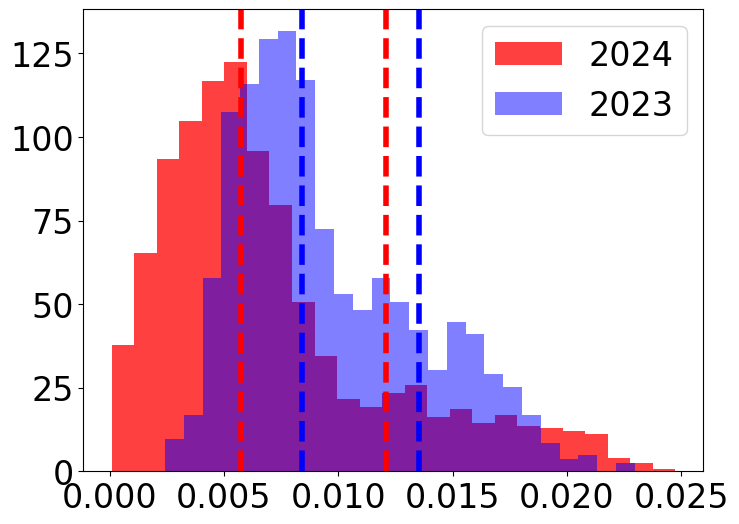

In [11]:
plt.figure(figsize=(8, 6))
s24 = np.array(shear_box_2024).flatten()
s23 = np.array(shear_box_2023).flatten()
plt.hist(s24, bins=25, density=True, alpha=0.75, label = '2024', color = 'r')
plt.hist(s23, bins=25, density=True, alpha=0.5, label = '2023', color = 'b')
plt.axvline(x=(np.nanmean(s24) + np.nanstd(s24)), color='r', linestyle='dashed', linewidth=4)
plt.axvline(x=(np.nanmean(s23) + np.nanstd(s23)), color='b', linestyle='dashed', linewidth=4)

plt.axvline(x=(np.nanmedian(s24)), color='r', linestyle='dashed', linewidth=4)
plt.axvline(x=(np.nanmedian(s23)), color='b', linestyle='dashed', linewidth=4)
plt.legend()

plt.show()

In [12]:
10**(-18.7)

1.995262314968883e-19

In [13]:
print(np.nanmedian(s23))
print(np.nanmedian(s24))


0.00841134
0.005762714


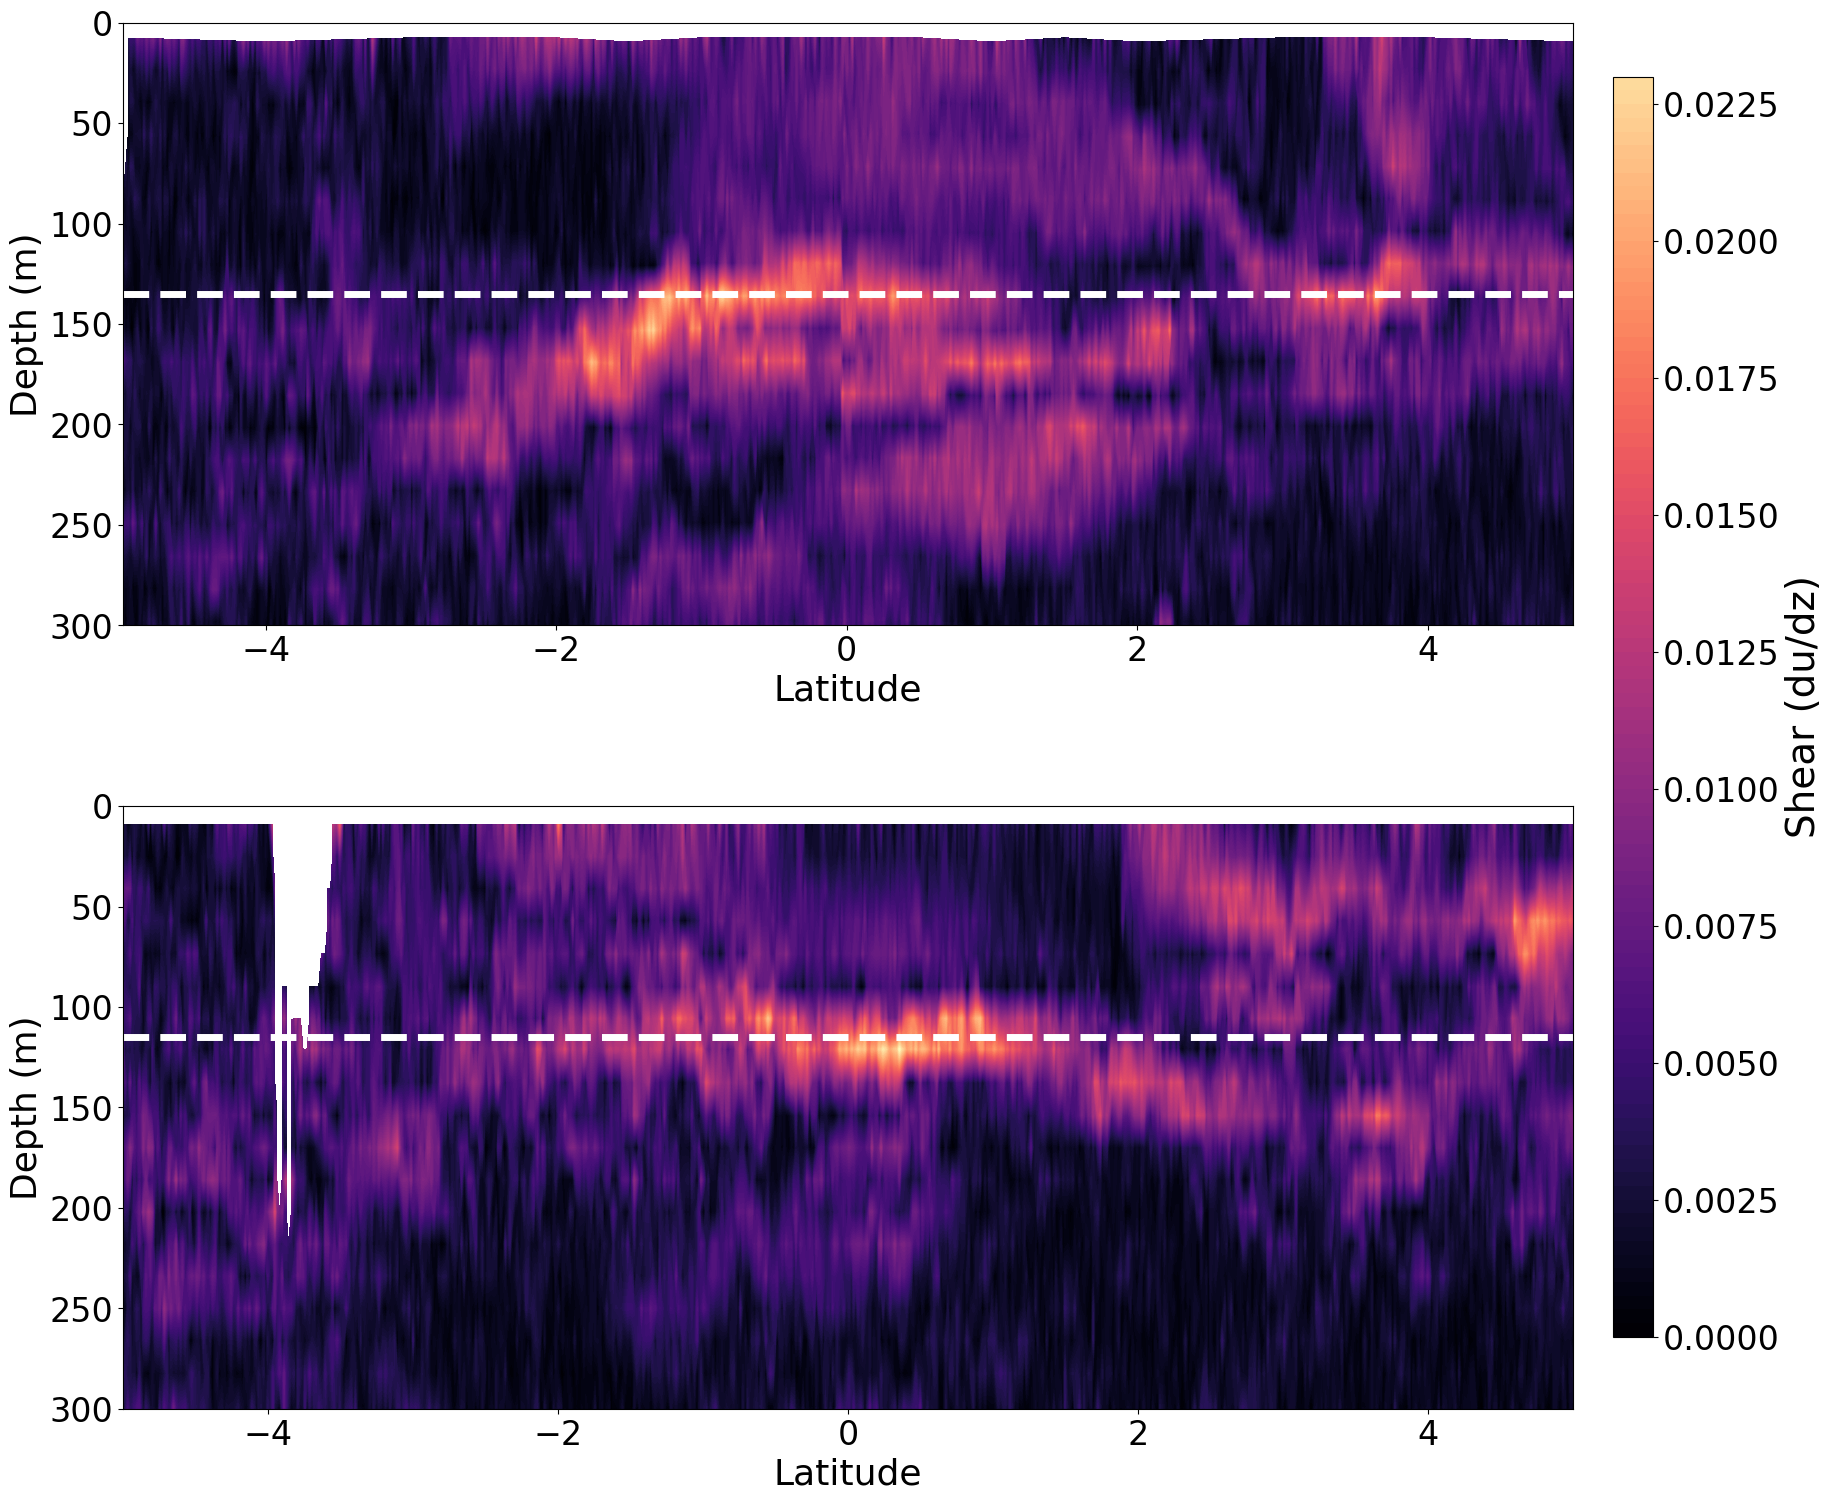

In [14]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(shear_2023.values), np.nanmax(shear_2024.values))
min_value = min(np.nanmin(shear_2023.values), np.nanmin(shear_2024.values))

# 2023 zonal velocity
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, shear_2023, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Zonal Velocity 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 zonal velocity
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, shear_2024, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Zonal Velocity 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Shear (du/dz)', fontsize=20+8)
#plt.savefig('Shear.png', dpi=300, bbox_inches='tight')
plt.show()

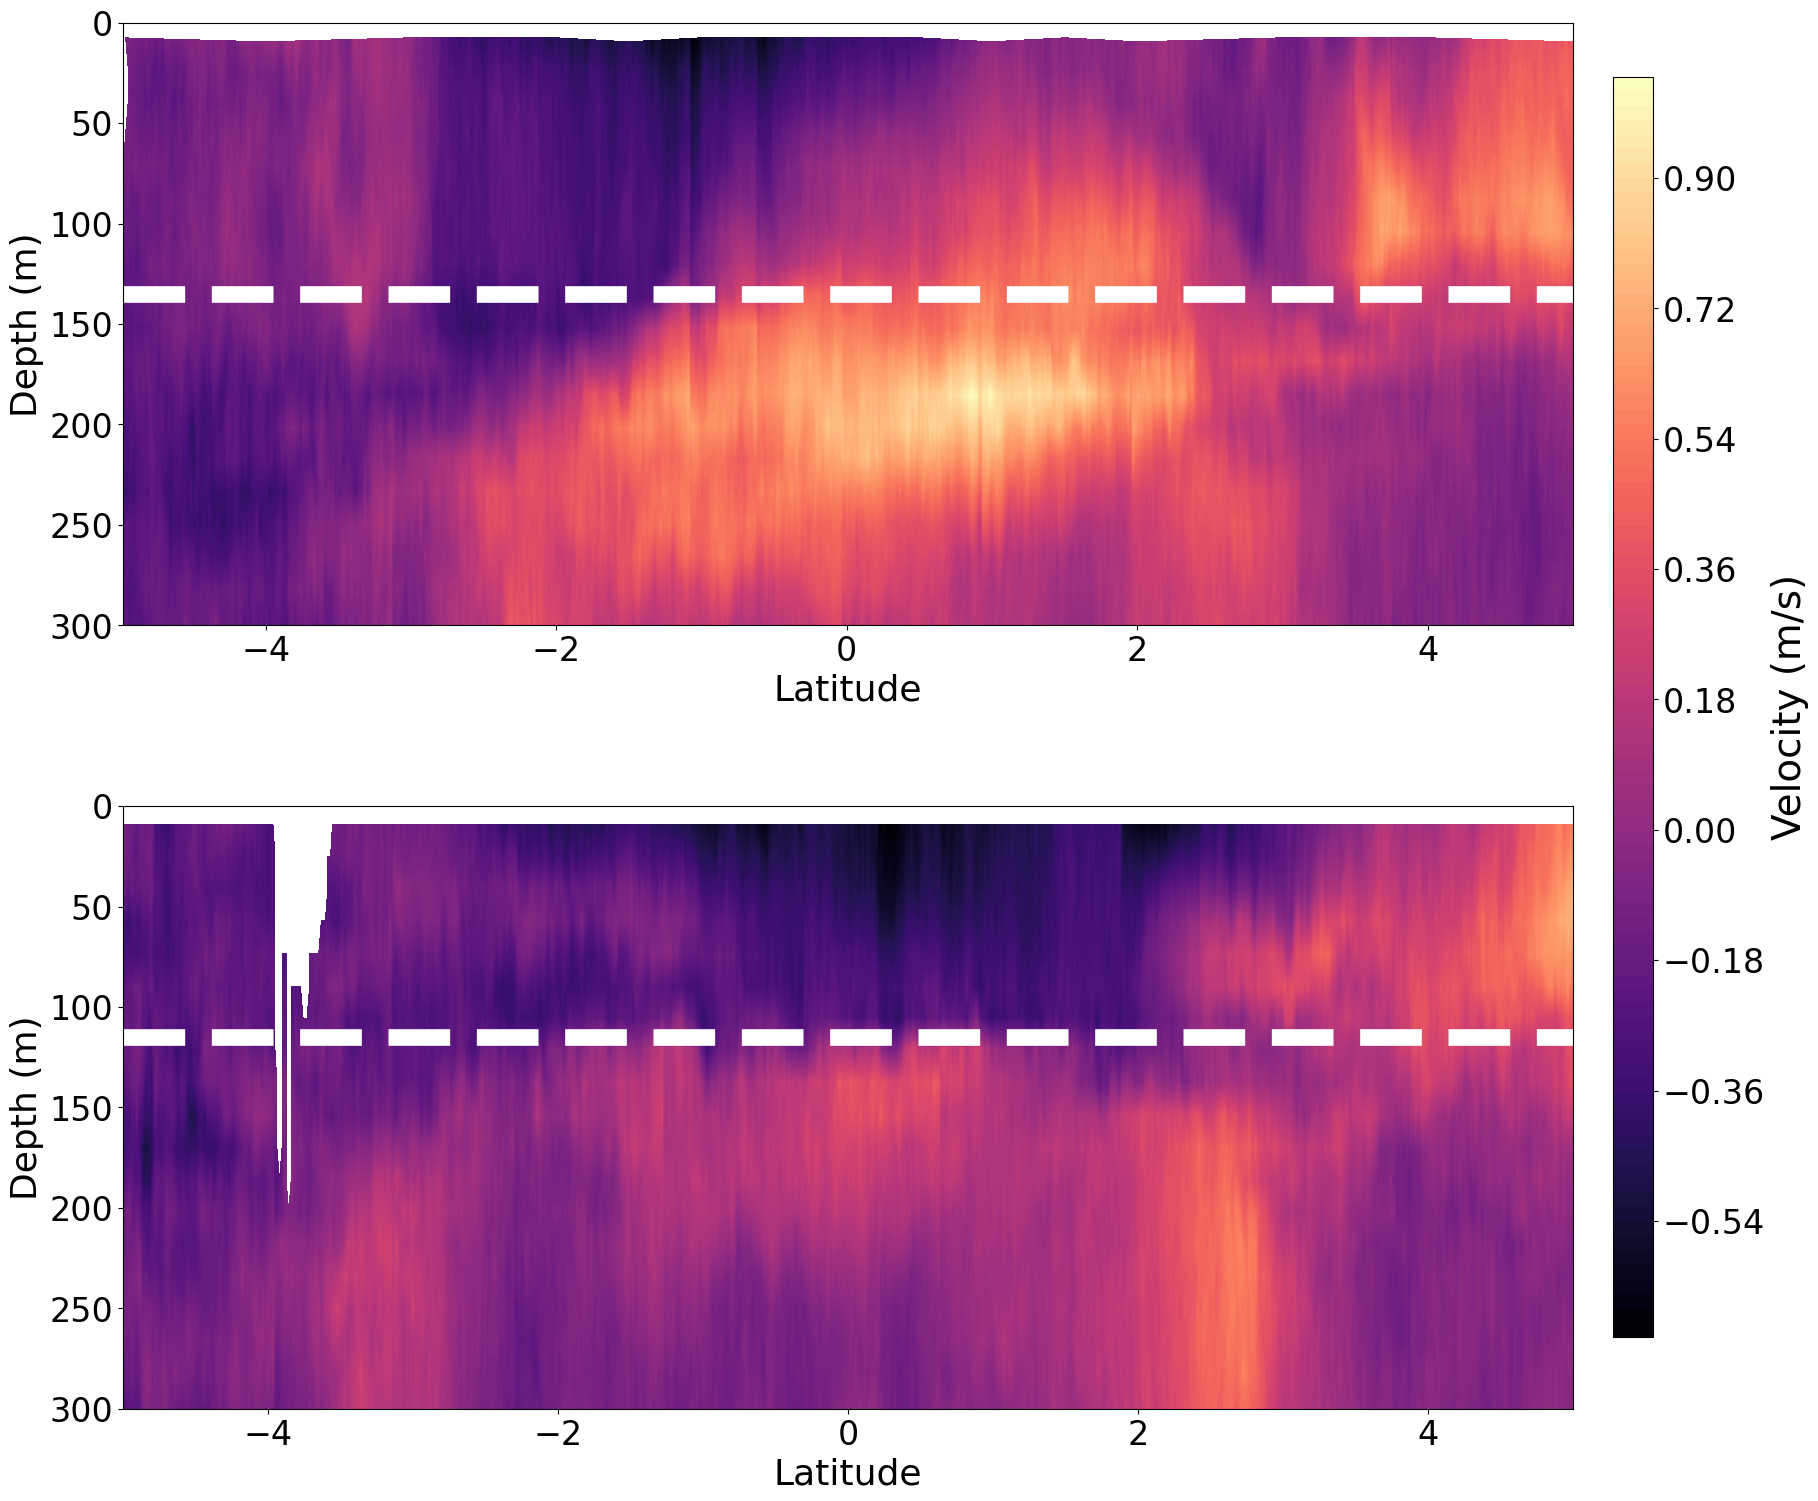

In [15]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(u_2023.values), np.nanmax(u_2024.values))
min_value = min(np.nanmin(u_2023.values), np.nanmin(u_2024.values))

# 2023 zonal velocity
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, u_2023, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
#ax1.axhline(y=185, color='white', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 12)
#ax1.axhline(y=75, color='white', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Zonal Velocity 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 zonal velocity
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, u_2024, levels=100, cmap='magma', vmax=max_value, vmin = min_value)
#ax2.axhline(y=140, color='white', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 12)
#ax2.axhline(y=75, color='white', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Zonal Velocity 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Velocity (m/s)', fontsize=20+8)
#plt.savefig('Zonal Velocity.png', dpi=300, bbox_inches='tight')
plt.show()

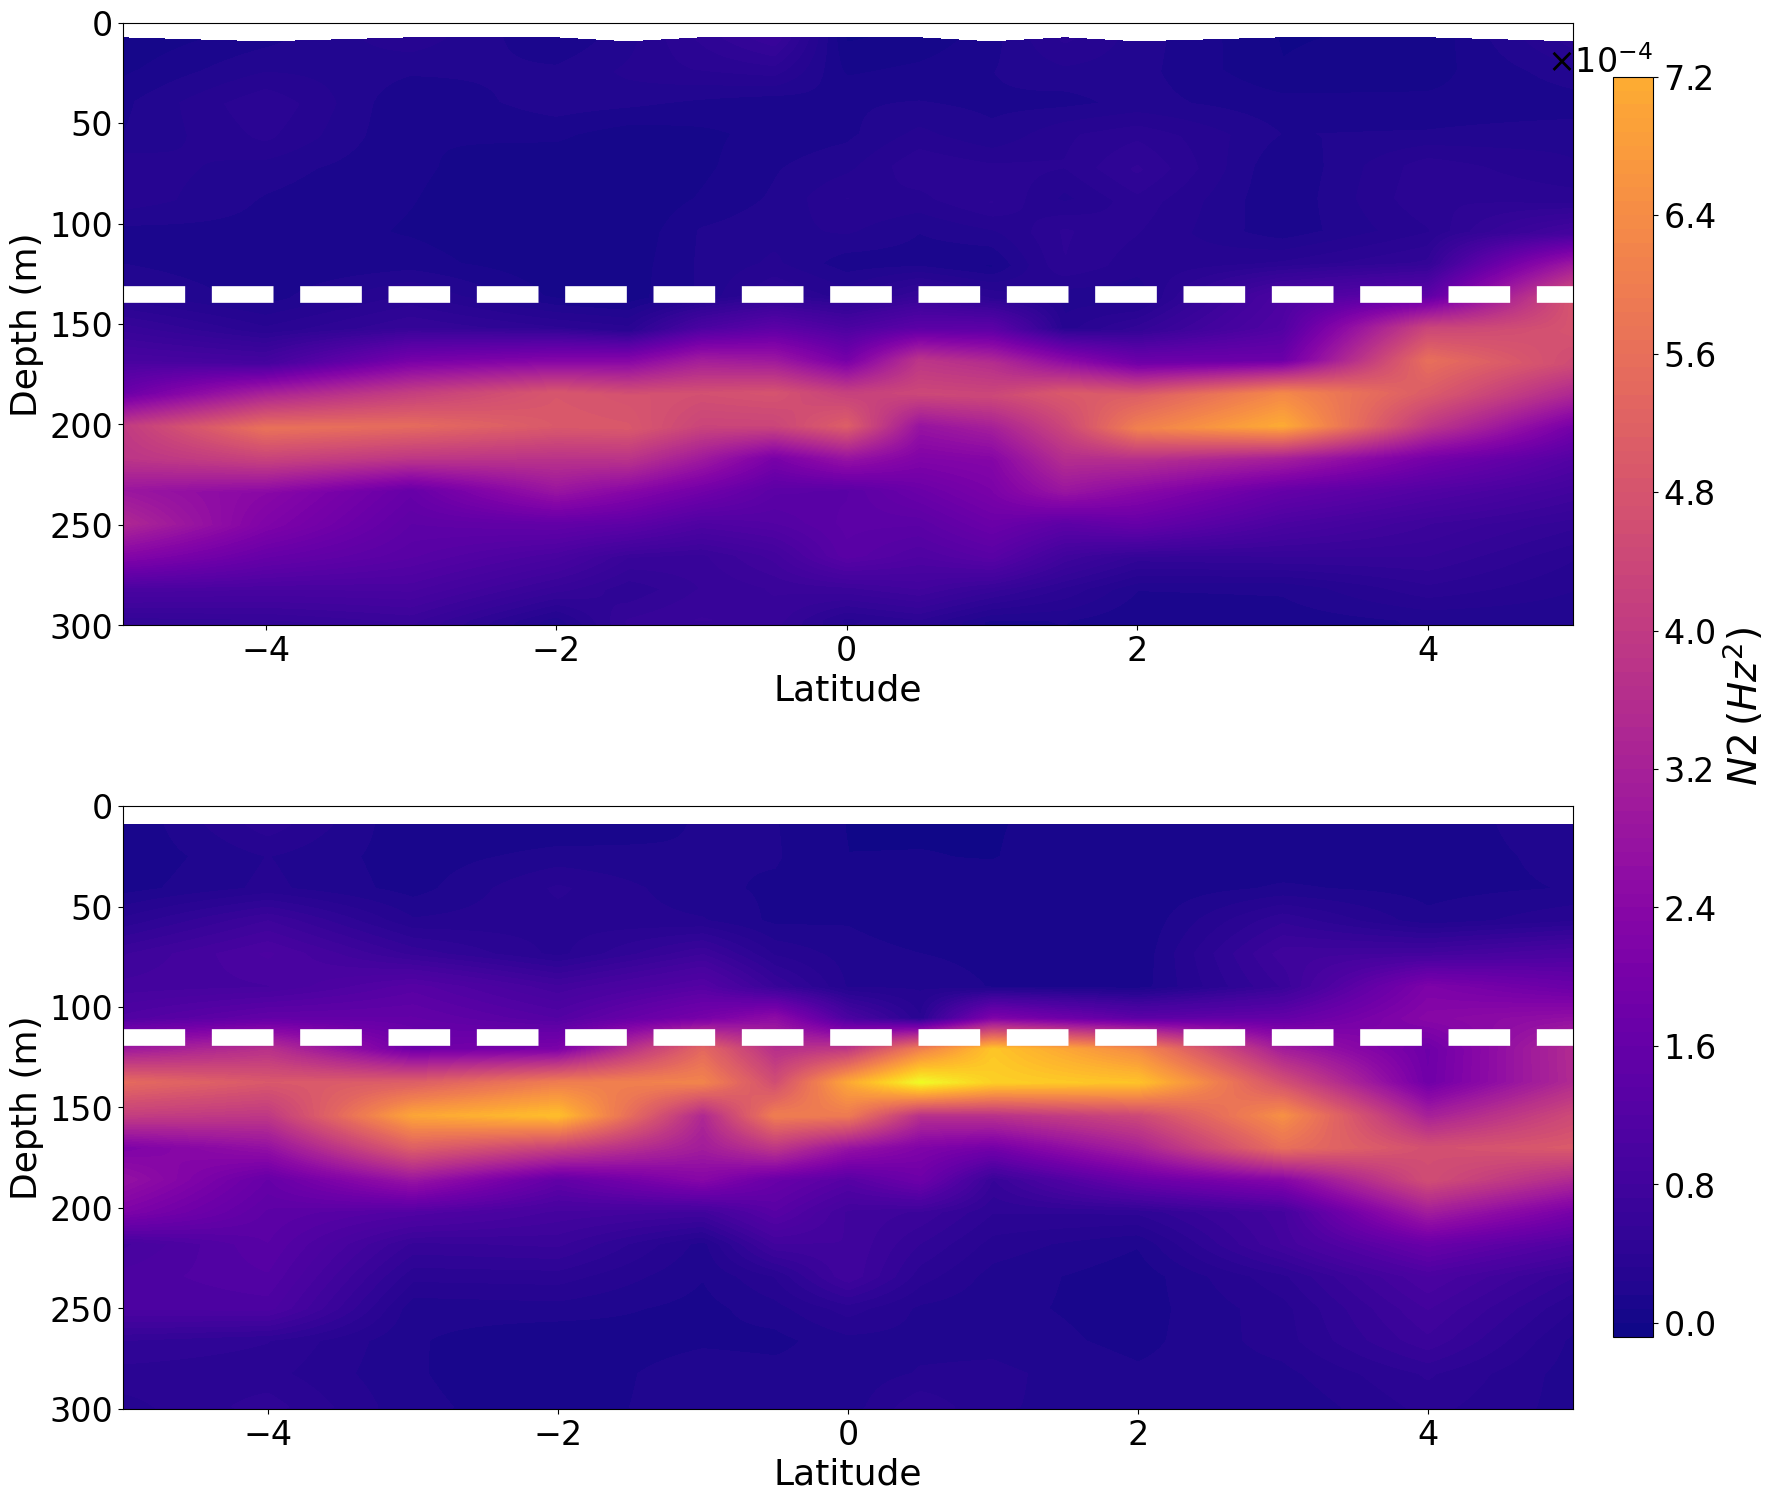

In [16]:
from matplotlib.ticker import ScalarFormatter
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))
max_value = max(np.nanmax(N2_2023.values), np.nanmax(N2_2024.values))

# 2023 N2
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, N2_2023, levels=100, cmap='plasma', vmax=max_value)
#ax1.axhline(y=185, color='white', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 12)
#ax1.axhline(y=75, color='white', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 N2 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 N2
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, N2_2024, levels=100, cmap='plasma', vmax=max_value)
#ax2.axhline(y=140, color='white', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 12)
#ax2.axhline(y=75, color='white', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 N2 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])

# Use ScalarFormatter for scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Adjust as needed
colorbar = plt.colorbar(contour1, cax=cbar_ax, format=formatter)
colorbar.set_label(r'$N2 \, (Hz^2)$', fontsize=20 + 8)

#plt.savefig('N2.png', dpi=300, bbox_inches='tight')

plt.show()

# signal from the thermocline above

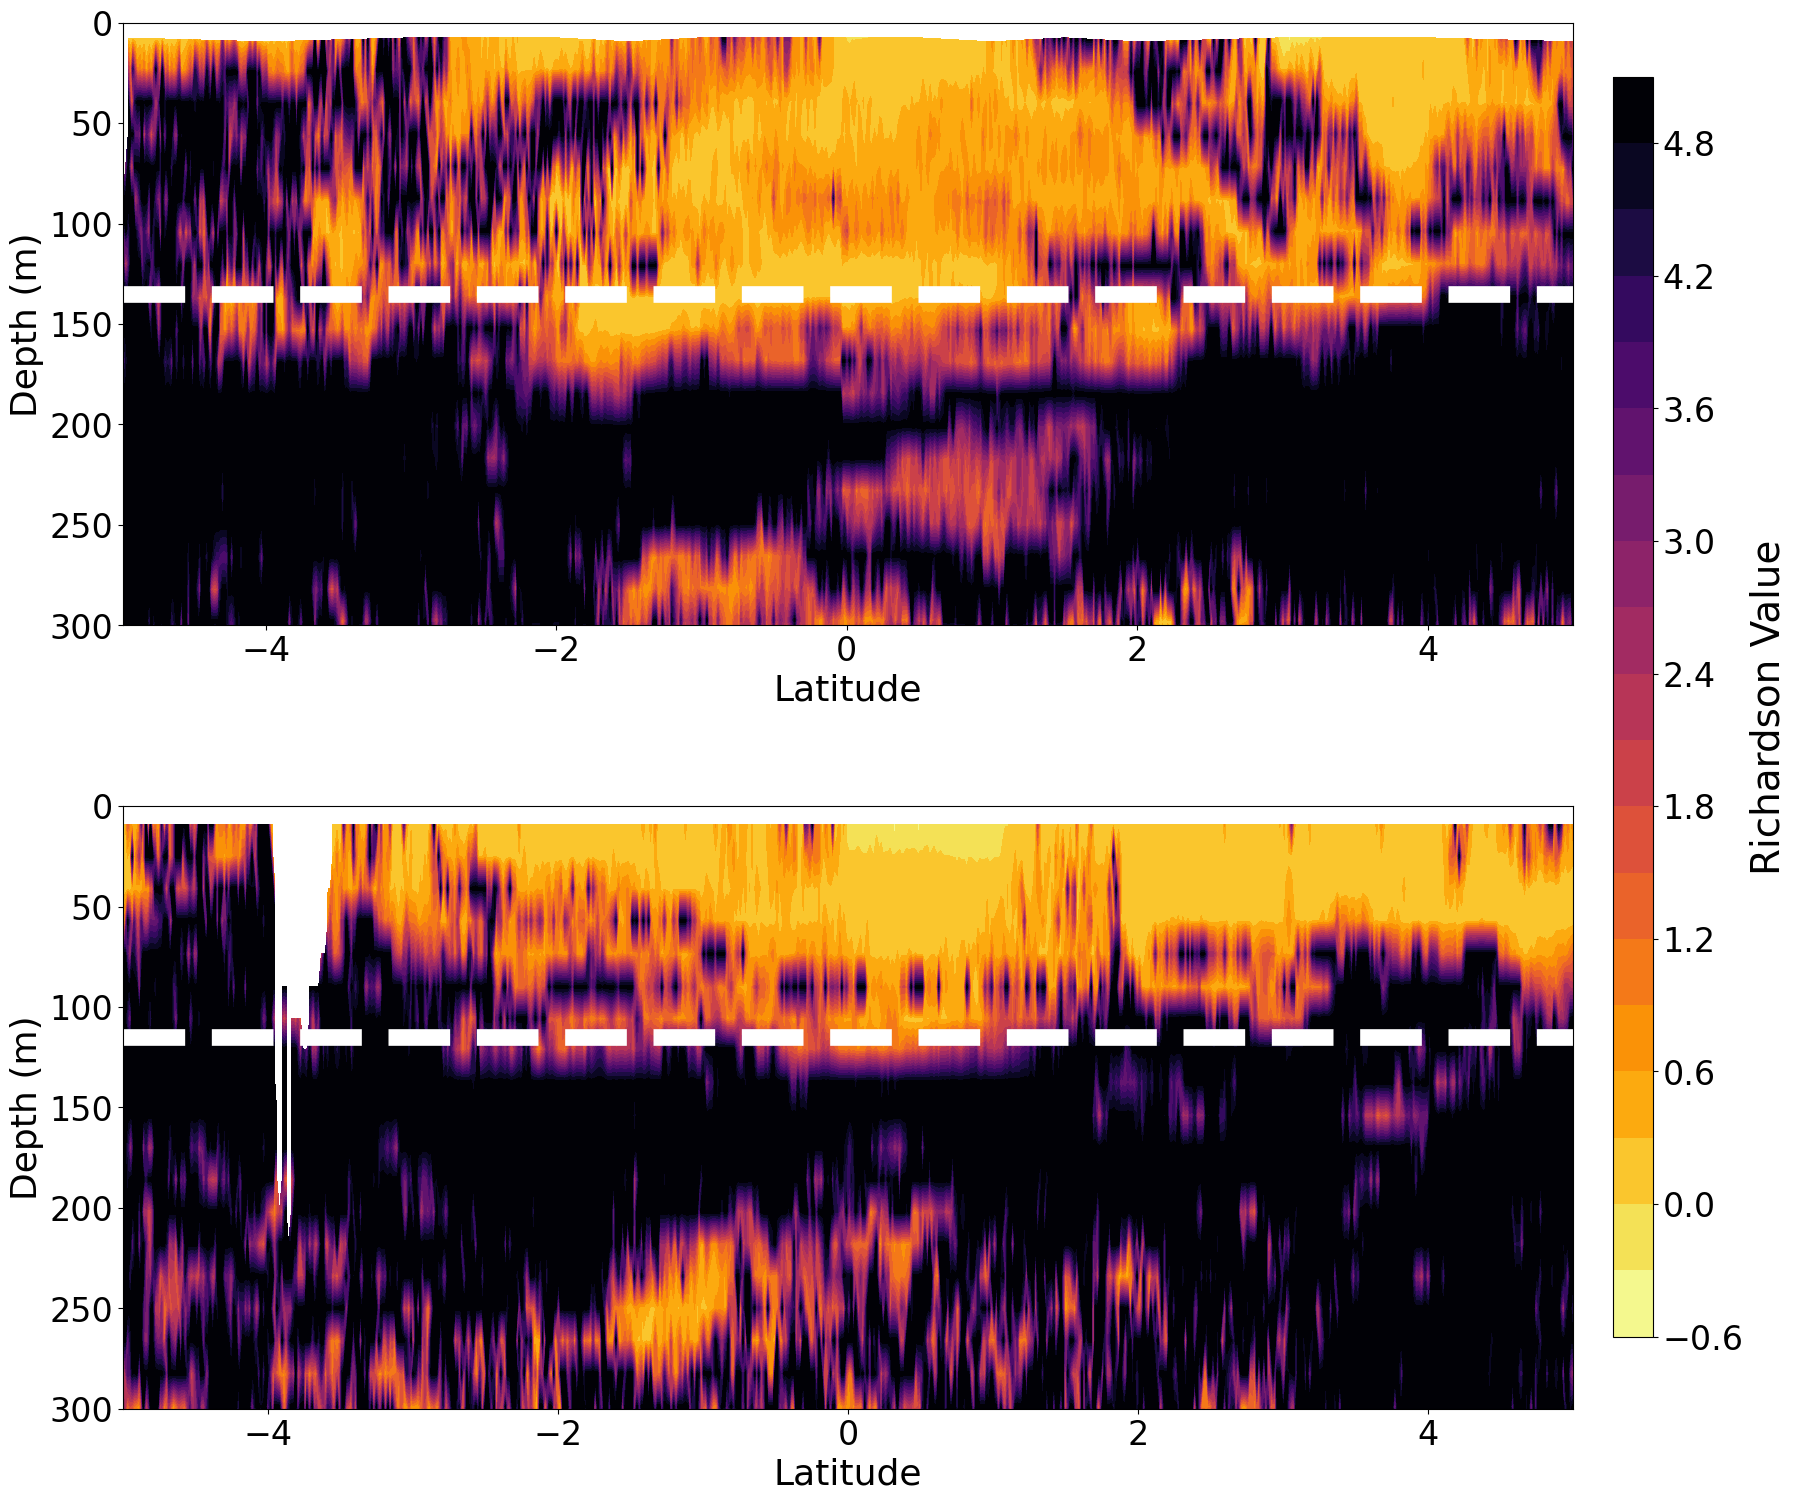

In [17]:
# Create a grid of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))


visualize_ri_2023 = ri_2023.clip(lower = -0.5, upper=5) # aide visualization
visualize_ri_2024 = ri_2024.clip(lower = -0.5, upper=5) # aide visualization

max_value = max(np.nanmax(visualize_ri_2023.values), np.nanmax(visualize_ri_2024.values))

# 2023 ri
contour1 = ax1.contourf(lat_binned_2023, P_binned_2023, visualize_ri_2023, levels=20, cmap='inferno_r', vmax=max_value)
#ax1.axhline(y=185, color='white', linewidth = 5)
ax1.axhline(y=135, color='white', linestyle='--', linewidth = 12)
#ax1.axhline(y=75, color='white', linewidth = 5)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Depth (m)')
#ax1.set_title('2023 Richardson Numbers 180 degrees')
ax1.set_ylim(0, 300)
ax1.invert_yaxis()

# 2024 ri
contour2 = ax2.contourf(lat_binned_2024, P_binned_2024, visualize_ri_2024, levels=20, cmap='inferno_r', vmax=max_value)
#ax2.axhline(y=140, color='white', linewidth = 5)
ax2.axhline(y=115, color='white', linestyle='--', linewidth = 12)
#ax2.axhline(y=75, color='white', linewidth = 5)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Depth (m)')
#ax2.set_title('2024 Richardson Numbers 167 degrees West')
ax2.set_ylim(0, 300)
ax2.invert_yaxis()

# Adjust the layout to include a common colorbar on the right side
plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(contour1, cax=cbar_ax)
colorbar.set_label('Richardson Value', fontsize=20+8)

#plt.savefig('Ri.png', dpi=300, bbox_inches='tight')

plt.show()

In [18]:
np.shape(ri_2023)
np.shape(ri_2024)

(40, 630)

In [19]:
# eliminate surface mixing by removing top 75 meters
ri_2023_metrics_1 = ri_2023.drop(ri_2023.index[:4])
ri_2024_metrics_1 = ri_2024.drop(ri_2024.index[:4])

# eliminate skewing of metrics by removing below EUC max.
ri_2023_metrics = ri_2023_metrics_1.drop(ri_2023_metrics_1.index[10:])
ri_2024_metrics = ri_2024_metrics_1.drop(ri_2024_metrics_1.index[8:])

In [20]:
ri_2023_metrics.columns = range(len(ri_2023_metrics.columns))
ri_2024_metrics.columns = range(len(ri_2024_metrics.columns))

In [21]:
ri_2023_metrics = ri_2023_metrics.iloc[:, 252:378]
ri_2024_metrics = ri_2024_metrics.iloc[:, 252:378]

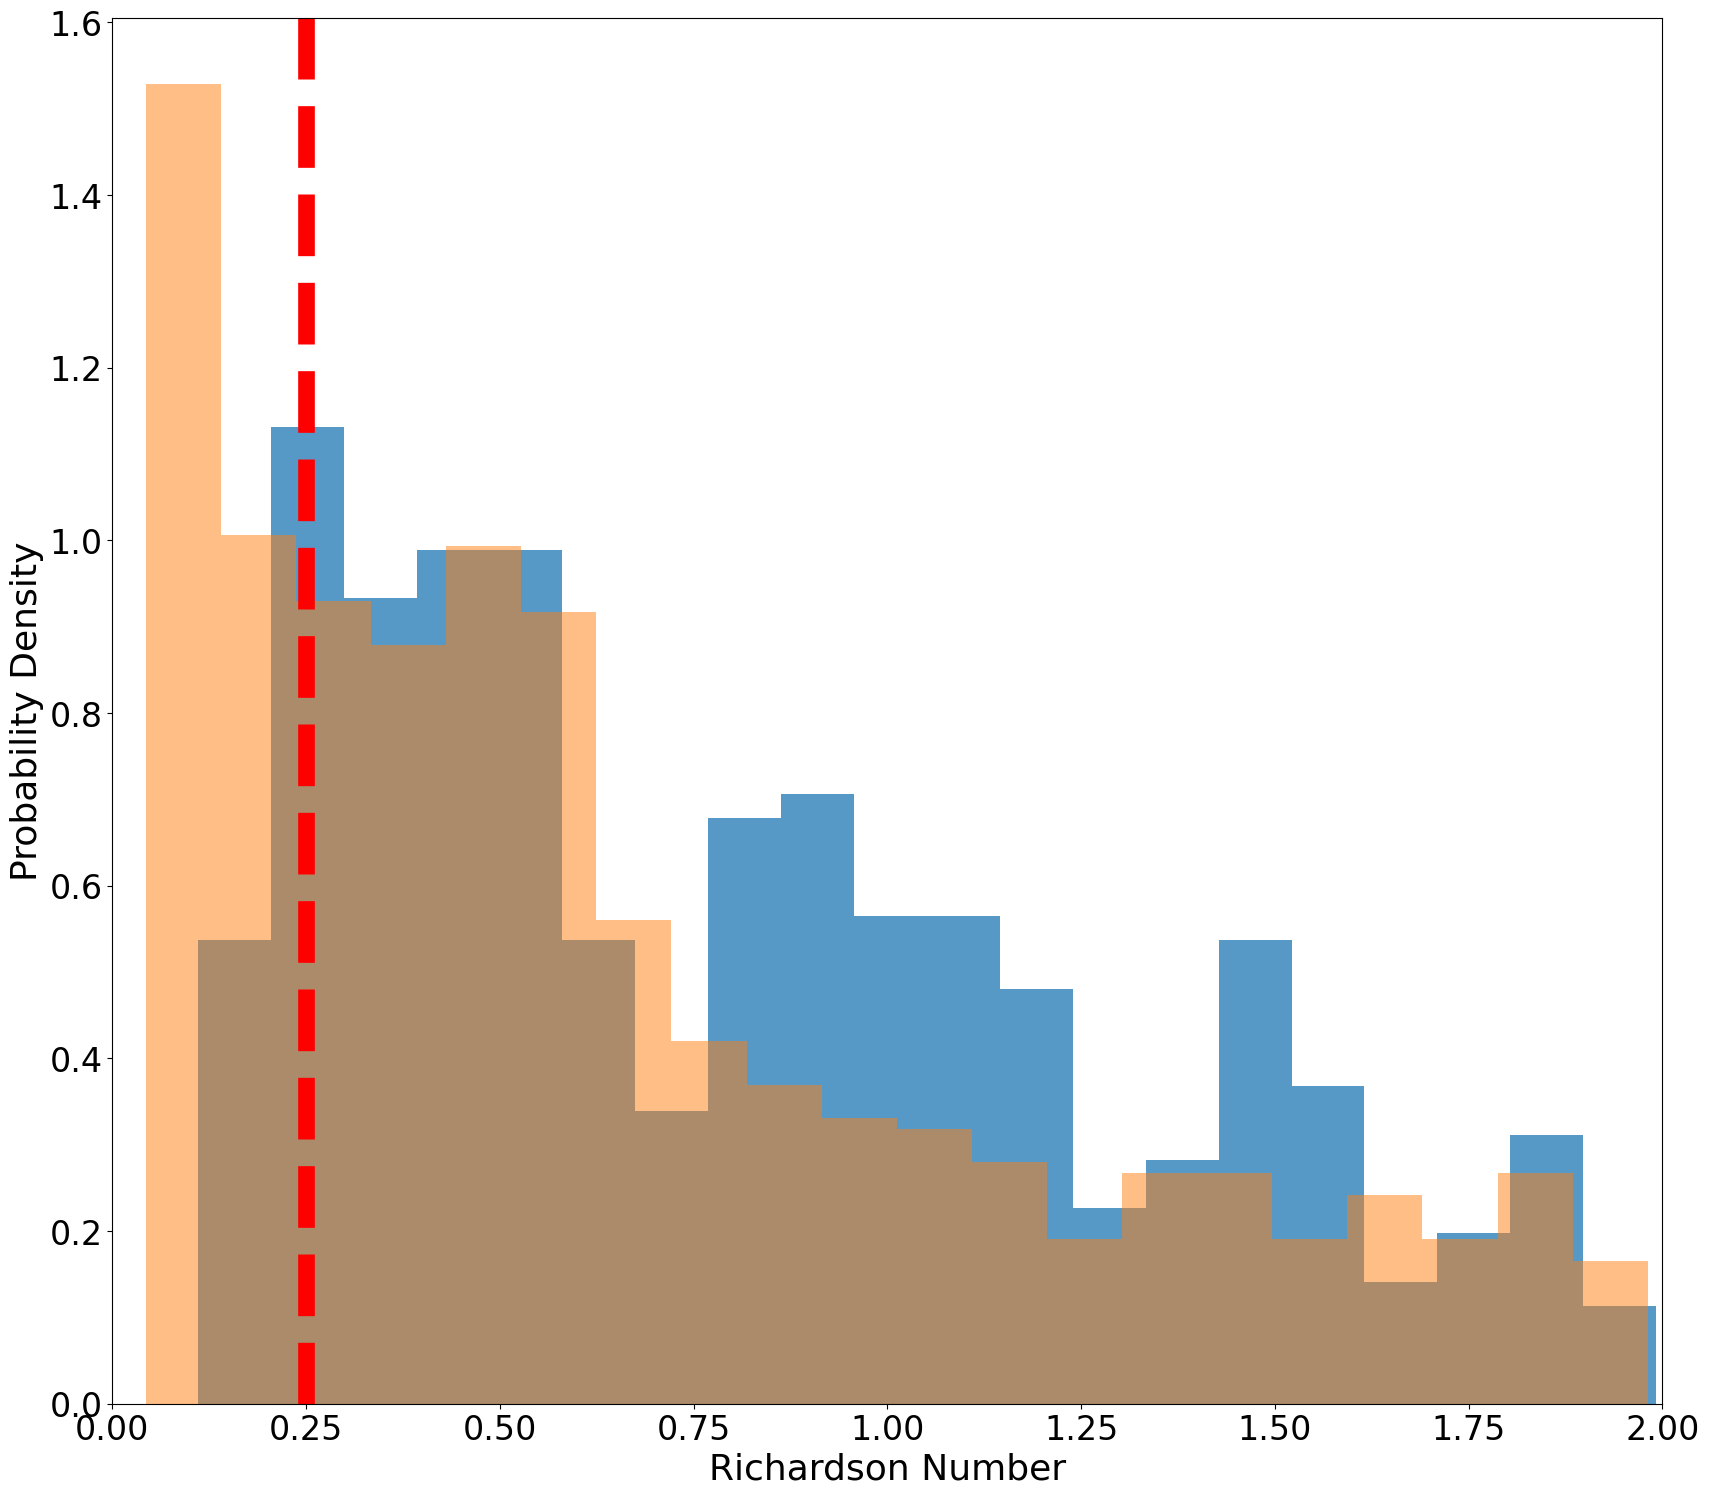

In [22]:
ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 2].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 2].tolist()
#  FOR PRESENTATION

plt.figure(figsize=(20, 18))
ri_crit_2024_hist = plt.hist(ri_crit_2024, bins=20, density=True, alpha=0.75, label = '2024')
ri_crit_2023_hist = plt.hist(ri_crit_2023, bins=20, density=True, alpha=0.5, label = '2023')
plt.axvline(x=0.25, color='red', linestyle='dashed', linewidth=12)
plt.ylabel('Probability Density')
plt.xlabel('Richardson Number')
plt.xlim(0, 2)
#axs[1].set_title('')
#.legend(loc='upper right')

#plt.savefig('Presentation_Ri_Histogram.png', dpi=300, bbox_inches='tight')


plt.show()

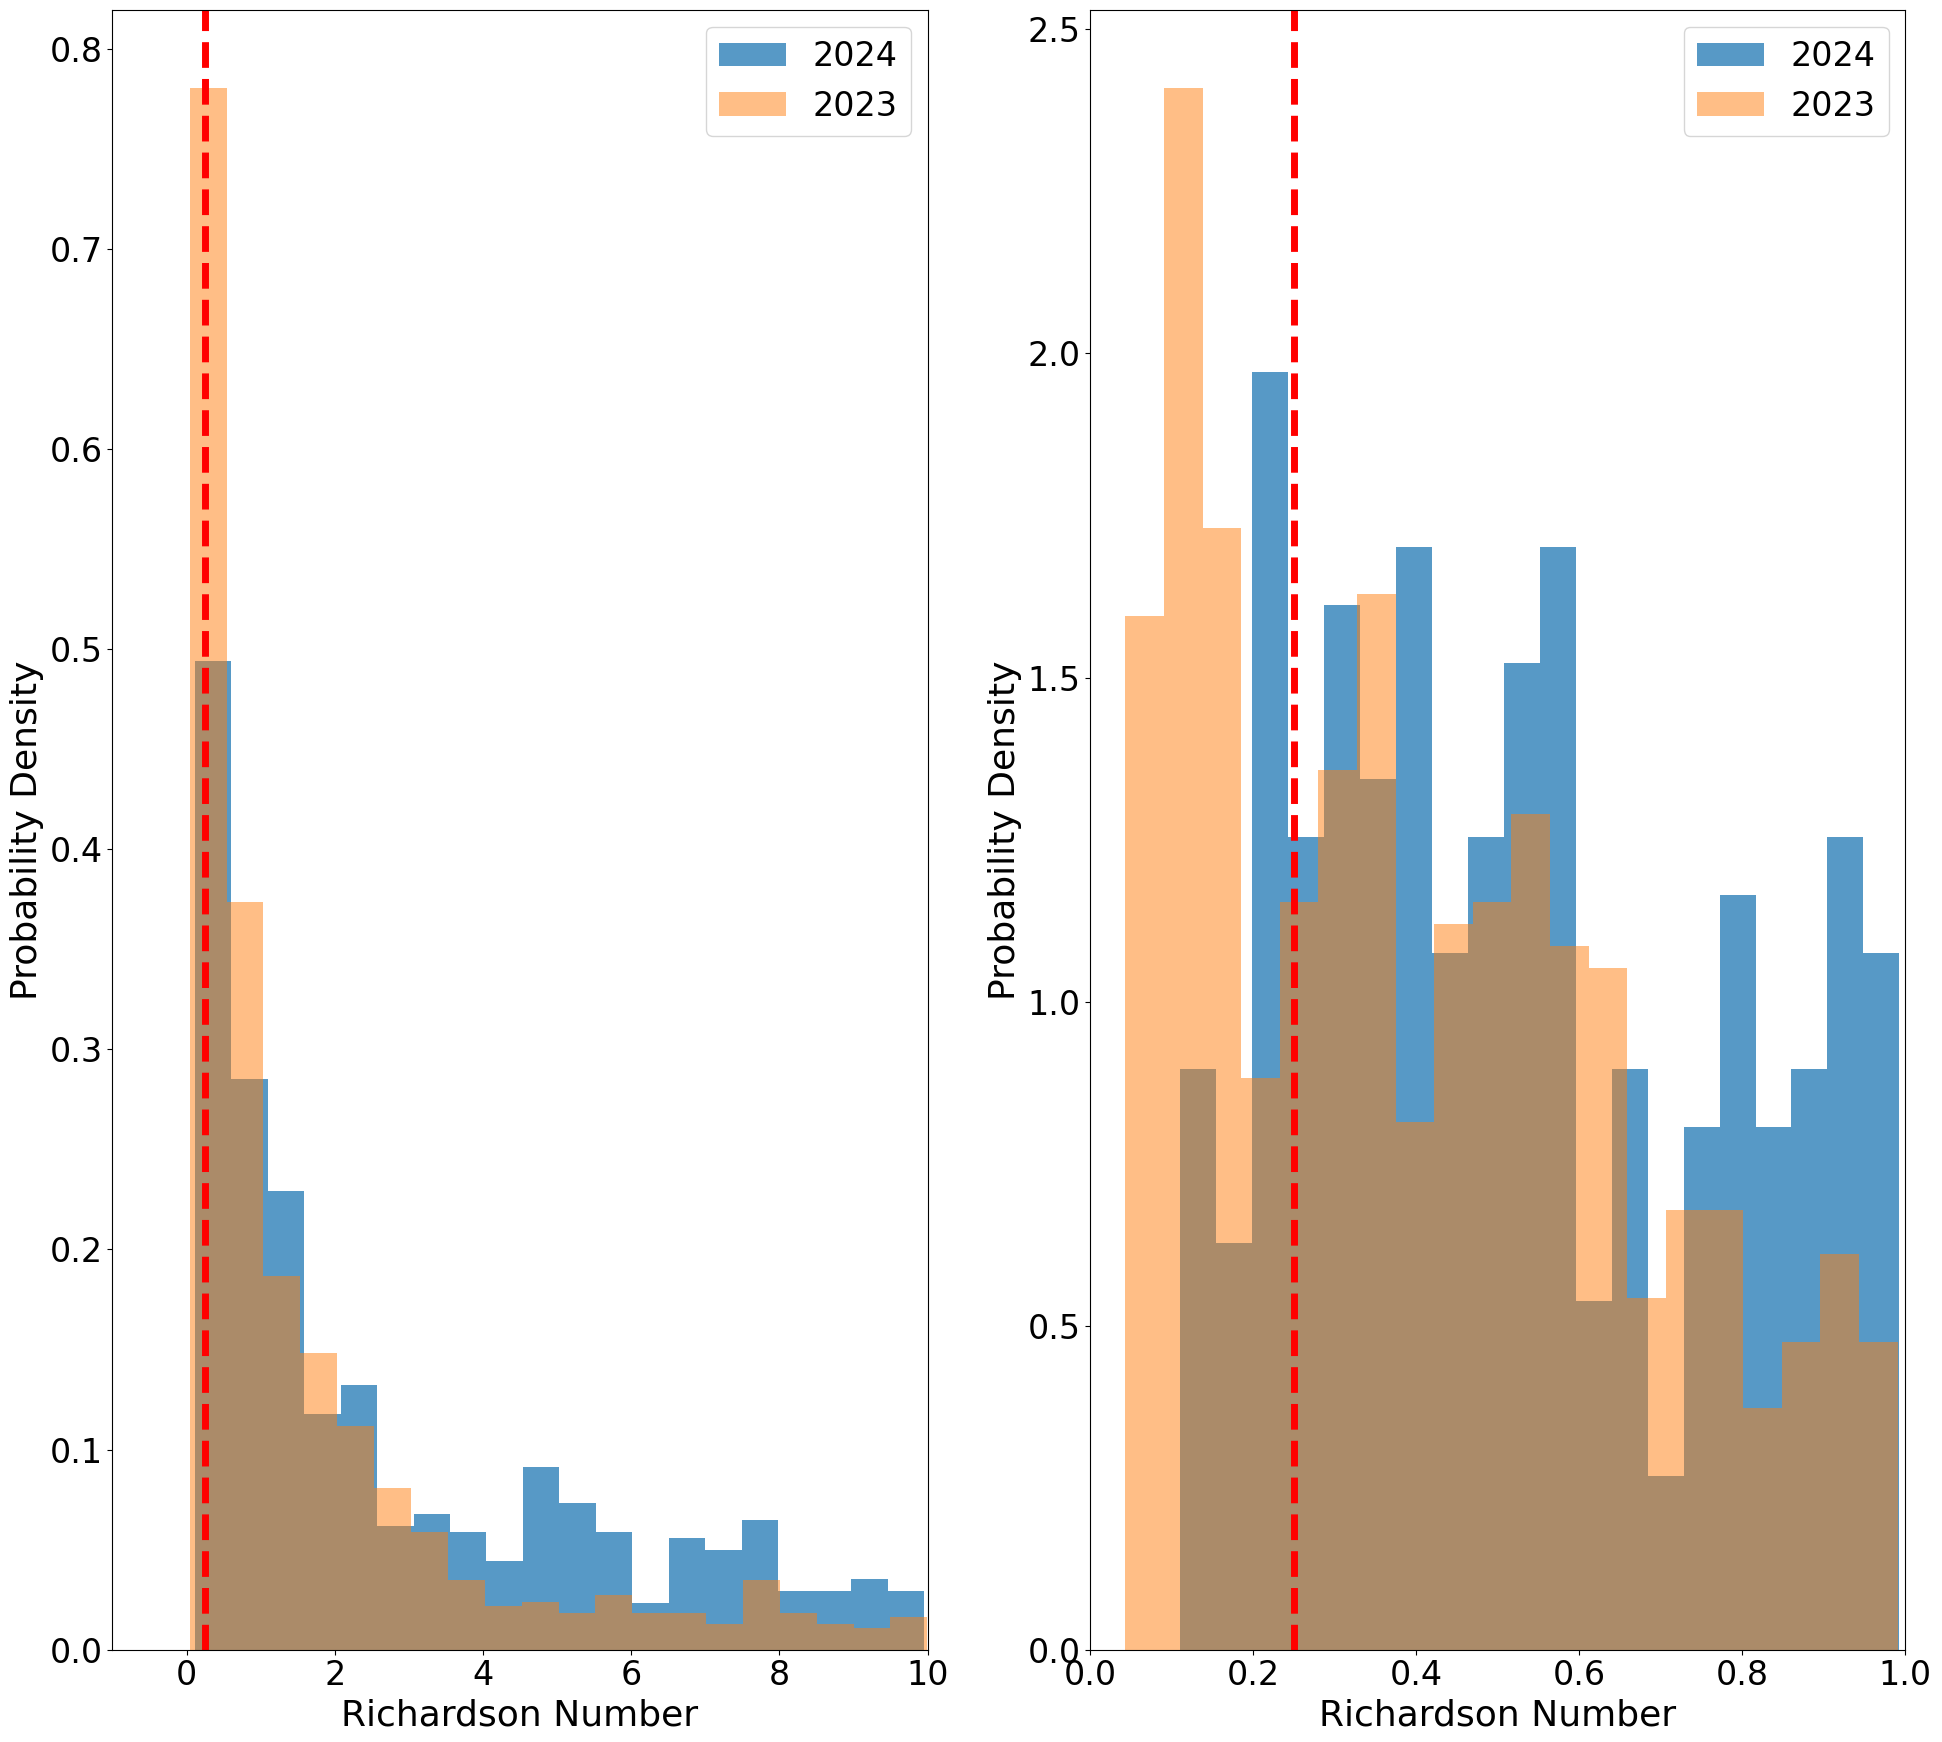

In [23]:
# FOR VISUALIZATION
ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 10].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 10].tolist()

fig, axs = plt.subplots(1, 2, figsize=(20, 18), sharey=False)

# Plot PDF
axs[0].hist(ri_crit_2024, bins=20, density=True, alpha=0.75, label = '2024')
axs[0].hist(ri_crit_2023, bins=20, density=True, alpha=0.5, label = '2023')
axs[0].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[0].set_ylabel('Probability Density')
axs[0].set_xlabel('Richardson Number')
axs[0].set_xlim(-1, 10)
#axs[0].set_title('Richardson Distribution')
axs[0].legend(loc='upper right')

ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 1].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 1].tolist()

# Plot PDF zoomed in 
ri_crit_2024_hist = axs[1].hist(ri_crit_2024, bins=20, density=True, alpha=0.75, label = '2024')
ri_crit_2023_hist = axs[1].hist(ri_crit_2023, bins=20, density=True, alpha=0.5, label = '2023')
axs[1].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[1].set_ylabel('Probability Density')
axs[1].set_xlabel('Richardson Number')
axs[1].set_xlim(0, 1)
#axs[1].set_title('')
axs[1].legend(loc='upper right')

#plt.savefig('Ri_Histogram.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

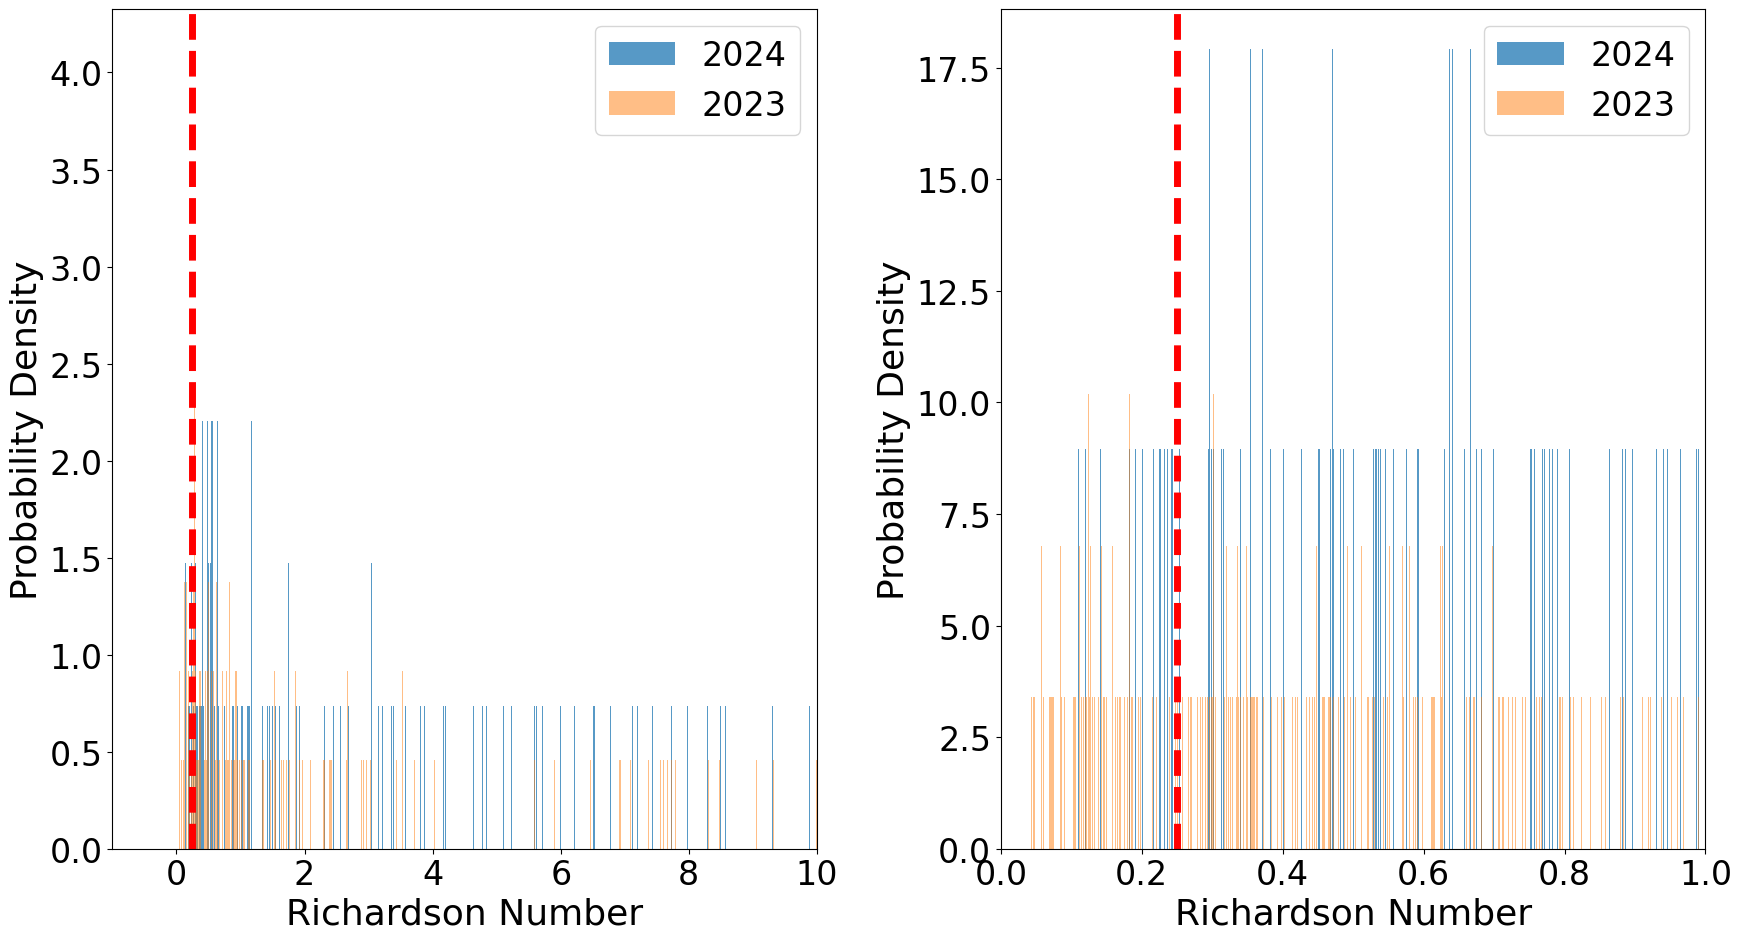

In [24]:
# FOR GETTING ACCURATE INTEGRATED PROBABILITY DENSITIES
ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 10].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 10].tolist()

fig, axs = plt.subplots(1, 2, figsize=(18, 10), sharey=False)

# Plot PDF
axs[0].hist(ri_crit_2024, bins=5000, density=True, alpha=0.75, label = '2024')
axs[0].hist(ri_crit_2023, bins=5000, density=True, alpha=0.5, label = '2023')
axs[0].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[0].set_ylabel('Probability Density')
axs[0].set_xlabel('Richardson Number')
axs[0].set_xlim(-1, 10)
#axs[0].set_title('Richardson Distribution')
axs[0].legend(loc='upper right')

ri_crit_2023 = ri_2023_metrics.stack().loc[ri_2023_metrics.stack() <= 1].tolist()
ri_crit_2024 = ri_2024_metrics.stack().loc[ri_2024_metrics.stack() <= 1].tolist()

# Plot PDF zoomed in 
ri_crit_2024_hist = axs[1].hist(ri_crit_2024, bins=2000, density=True, alpha=0.75, label = '2024') # SAVE HIST
ri_crit_2023_hist = axs[1].hist(ri_crit_2023, bins=2000, density=True, alpha=0.5, label = '2023') # SAVE HIST
axs[1].axvline(x=0.25, color='red', linestyle='dashed', linewidth=5)
axs[1].set_ylabel('Probability Density')
axs[1].set_xlabel('Richardson Number')
axs[1].set_xlim(0, 1)
#axs[1].set_title('')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [25]:
# CALCULATE INTEGRATED PROBABILITY DENSITIES

# Extracting bin heights and edges for 2024
heights_2024, edges_2024 = ri_crit_2024_hist[0], ri_crit_2024_hist[1]

# Calculating bin widths
widths_2024 = np.diff(edges_2024)
bin_centers_2024 = (edges_2024[:-1] + edges_2024[1:]) / 2

# Calculating integrated probability density for ri values less than 0.25
ri_range = (0, 0.25)
indices_2024 = (bin_centers_2024 >= ri_range[0]) & (bin_centers_2024 <= ri_range[1])
integrated_probability_2024 = np.sum(heights_2024[indices_2024] * widths_2024[indices_2024])

# Repeat the same process for 2023
heights_2023, edges_2023 = ri_crit_2023_hist[0], ri_crit_2023_hist[1]
widths_2023 = np.diff(edges_2023)
bin_centers_2023 = (edges_2023[:-1] + edges_2023[1:]) / 2
indices_2023 = (bin_centers_2023 >= ri_range[0]) & (bin_centers_2023 <= ri_range[1])
integrated_probability_2023 = np.sum(heights_2023[indices_2023] * widths_2023[indices_2023])

print(f"Integrated probability density for ri values in {ri_range} for 2024: {integrated_probability_2024}")
print(f"Integrated probability density for ri values in {ri_range} for 2023: {integrated_probability_2023}")



Integrated probability density for ri values in (0, 0.25) for 2024: 0.16600790513833993
Integrated probability density for ri values in (0, 0.25) for 2023: 0.3327974276527331


In [61]:
# 2023 Thorpe
# set some parameters
dnoise = 5e-4  # Noise parameter
alpha = 0.95  # Coefficient relating the Thorpe and Ozmidov scales.
# Background value of epsilon applied where no overturns are detected.
background_eps = 0
# Use the intermediate profile method for a full resolution cast
use_ip = True
# Critical value of the overturn ratio, default in package set to 0.3
# From the code: An overturn will be considered noise if Ro < Roc.
# Ro = min(L+/L, L-/L), or percentage of space occupied by positive and negative displacements
# This has to do with whether or not the overturn is encountered vertically and so perfectly measured
# in that case Ro = 0.5, or sampled obliquely so that Ro < 0.5
# See Gargett and Garner (2008) who suggest 0.2
Roc = 0.2
# N2 Calculation Method
N2_method = "endpt"

lon = float(167)

# set up empty dataframes:
epsilon_list = []
N2_th_list = []
thorpe_list = []
dens_inv_list = []
thorpe_scale_list = []

# iterate through mixsea calculations, appending to new dataframes
cast_num = 0
for cast in P_2023:
    depth = np.array(P_2023[cast]).astype(float)
    t = np.array(T_2023[cast]).astype(float)
    SP = np.array(S_2023[cast]).astype(float)
    lat = (latitudes_2023[cast_num])
    cast_num += 1

    # Calculate Thorpe scales and diagnostics.
    eps, N2_th, diag = mx.overturn.eps_overturn(
        depth,
        t,
        SP,
        lon,
        lat,
        dnoise=dnoise,
        alpha=alpha,
        Roc=Roc,
        background_eps=background_eps,
        use_ip=use_ip,
        N2_method = N2_method,
        return_diagnostics=True
    )
    # clean
    #thorpe = np.where(thorpe > 50, np.nan, thorpe)

    
    # append to lists
    epsilon_list.append(pd.DataFrame({cast: eps}))
    thorpe_list.append(pd.DataFrame({cast: diag["thorpe_disp"]}))
    N2_th_list.append(pd.DataFrame({cast: N2_th}))
    dens_inv_list.append(pd.DataFrame({cast: np.array(diag["dens"]) - np.array(diag["dens_sorted"])}))
    thorpe_scale_list.append(pd.DataFrame({cast: diag["Lt"]}))
    
# concat
eps = pd.concat(epsilon_list, axis = 1)
N2_th = pd.concat(N2_th_list, axis = 1)
thorpe = pd.concat(thorpe_list, axis = 1)
dens_inv = pd.concat(dens_inv_list, axis = 1)
thorpe_scale = pd.concat(thorpe_scale_list, axis = 1)


depth_values = P_2023['4130202d_val'].values
np.shape(depth_values)

thorpe_displacements_2023 = []
thorpe_lats_2023 = []
thorpe_depths_2023 = []
count = 0
for col in thorpe:
    depth_count = 0
    for val in thorpe[col].values:
        if val > 0:
            thorpe_displacements_2023.append(val)
            thorpe_lats_2023.append(round(latitudes_2023[count],1))
            thorpe_depths_2023.append(depth_values[depth_count])
        depth_count += 1
    count += 1


epsilon_2023 = []
eps_lats_2023 = []
eps_depths_2023 = []
count = 0



for col in eps:
    depth_count = 0
    for val in eps[col].values:
        if val > 0:
            epsilon_2023.append(val)
            eps_lats_2023.append(round(latitudes_2023[count],1))
            eps_depths_2023.append(depth_values[depth_count])
        depth_count += 1
    count += 1

In [62]:
# 2024 Thorpe
# set some parameters
dnoise = 5e-4  # Noise parameter
alpha = 0.95  # Coefficient relating the Thorpe and Ozmidov scales.
# Background value of epsilon applied where no overturns are detected.
background_eps = 0
# Use the intermediate profile method for a full resolution cast
use_ip = True
# Critical value of the overturn ratio, default in package set to 0.3
# From the code: An overturn will be considered noise if Ro < Roc.
# Ro = min(L+/L, L-/L), or percentage of space occupied by positive and negative displacements
# This has to do with whether or not the overturn is encountered vertically and so perfectly measured
# in that case Ro = 0.5, or sampled obliquely so that Ro < 0.5
# See Gargett and Garner (2008) who suggest 0.2
Roc = 0.2
# N2 Calculation Method
N2_method = "endpt"

lon = float(167)

# set up empty dataframes:
epsilon_list = []
N2_th_list = []
thorpe_list = []
dens_inv_list = []
thorpe_scale_list = []

# iterate through mixsea calculations, appending to new dataframes
cast_num = 0
for cast in P_2024:
    depth = np.array(P_2024[cast]).astype(float)
    t = np.array(T_2024[cast]).astype(float)
    SP = np.array(S_2024[cast]).astype(float)
    lat = (latitudes_2024[cast_num])
    cast_num += 1

    # Calculate Thorpe scales and diagnostics.
    eps, N2_th, diag = mx.overturn.eps_overturn(
        depth,
        t,
        SP,
        lon,
        lat,
        dnoise=dnoise,
        alpha=alpha,
        Roc=Roc,
        background_eps=background_eps,
        use_ip=use_ip,
        N2_method = N2_method,
        return_diagnostics=True
    )
    # clean
    #thorpe = np.where(thorpe > 50, np.nan, thorpe)

    
    # append to lists
    epsilon_list.append(pd.DataFrame({cast: eps}))
    thorpe_list.append(pd.DataFrame({cast: diag["thorpe_disp"]}))
    N2_th_list.append(pd.DataFrame({cast: N2_th}))
    dens_inv_list.append(pd.DataFrame({cast: np.array(diag["dens"]) - np.array(diag["dens_sorted"])}))
    thorpe_scale_list.append(pd.DataFrame({cast: diag["Lt"]}))
    
# concat
eps = pd.concat(epsilon_list, axis = 1)
N2_th = pd.concat(N2_th_list, axis = 1)
thorpe = pd.concat(thorpe_list, axis = 1)
dens_inv = pd.concat(dens_inv_list, axis = 1)
thorpe_scale = pd.concat(thorpe_scale_list, axis = 1)


depth_values = P_2024['TN4270301d_val'].values
np.shape(depth_values)

thorpe_displacements_2024 = []
thorpe_lats_2024 = []
thorpe_depths_2024 = []
count = 0
for col in thorpe:
    depth_count = 0
    for val in thorpe[col].values:
        if val > 0:
            thorpe_displacements_2024.append(val)
            thorpe_lats_2024.append(round(latitudes_2024[count],1))
            thorpe_depths_2024.append(depth_values[depth_count])
        depth_count += 1
    count += 1


epsilon_2024 = []
eps_lats_2024 = []
eps_depths_2024 = []
count = 0



for col in eps:
    depth_count = 0
    for val in eps[col].values:
        if val > 0:
            epsilon_2024.append(val)
            eps_lats_2024.append(round(latitudes_2024[count],1))
            eps_depths_2024.append(depth_values[depth_count])
        depth_count += 1
    count += 1

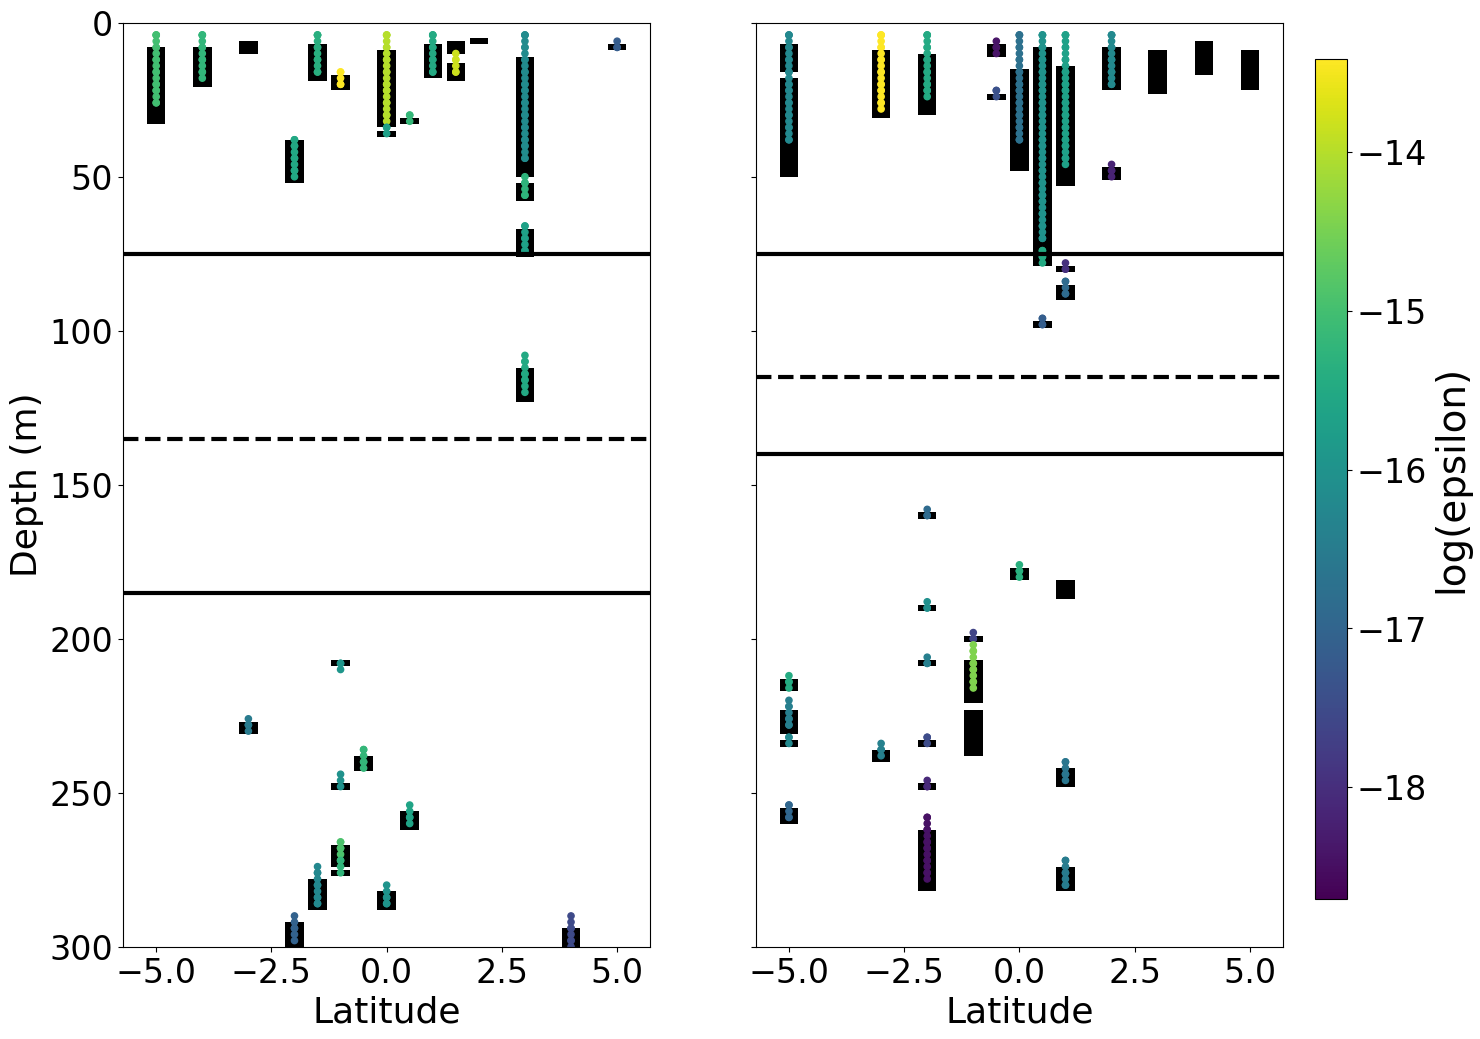

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharey=True)

# Plot for 2023 data
ax = axes[0]
ax.bar(thorpe_lats_2023, thorpe_displacements_2023, width=0.4,
       bottom=thorpe_depths_2023 - np.array(thorpe_displacements_2023) / 2, color='black')
sc = ax.scatter(eps_lats_2023, eps_depths_2023, c=np.log(epsilon_2023), cmap='viridis', marker='o', s=20)
ax.axhline(y=75, color='black', linewidth=3)
ax.axhline(y=185, color='black', linewidth=3)
ax.axhline(y=135, color='black', linestyle='--', linewidth=3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')

#cbar = plt.colorbar(sc, ax=ax)
#cbar.set_label('log(Epsilon)')

ax.set_ylim(0, 300)
ax.invert_yaxis()
#ax.set_title('2023')

# Plot for 2024 data
ax = axes[1]
# Replace _2023 with _2024 in the variable names
ax.bar(thorpe_lats_2024, thorpe_displacements_2024, width=0.4,
       bottom=thorpe_depths_2024 - np.array(thorpe_displacements_2024) / 2, color='black')
sc = ax.scatter(eps_lats_2024, eps_depths_2024, c=np.log(epsilon_2024), cmap='viridis', marker='o', s=20)
ax.axhline(y=75, color='black', linewidth=3)
ax.axhline(y=140, color='black', linewidth=3)
ax.axhline(y=115, color='black', linestyle='--', linewidth=3)
ax.set_xlabel('Latitude')

#cbar = plt.colorbar(sc, ax=ax)
#cbar.set_label('log(Epsilon)')

ax.set_ylim(0, 300)
ax.invert_yaxis()
#ax.set_title('2024')

plt.subplots_adjust(right=0.85, hspace=0.3)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])
colorbar = plt.colorbar(sc, cax=cbar_ax)
colorbar.set_label('log(epsilon)', fontsize=20+8)

#ticks = 10**np.arange(np.floor(np.min(np.log10(epsilon))), np.ceil(np.max(np.log10(epsilon)))+1)

#plt.subplots_adjust(right=0.85, hspace=0.3)
#cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])

# Set ticks and tick labels for the colorbar
#colorbar = plt.colorbar(sc, cax=cbar_ax, orientation='vertical')
#colorbar.set_ticks(np.log10(ticks))
#colorbar.set_ticklabels([f"{tick:.0e}" for tick in ticks])

#colorbar.set_label('log(epsilon)', fontsize=20 + 8)

plt.savefig('Thorpe_2023_2024.png', dpi=300, bbox_inches='tight')
#plt.tight_layout()
plt.show()